In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [340]:
df_nba = pd.read_csv("data/Advanced.csv", index_col = None, header = 0)
pd.options.display.max_columns = None
df_nba

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,39,357.0,12.1,0.635,0.867,0.063,1.9,10.1,6.1,7.8,0.4,0.5,3.7,16.3,0.6,0.2,0.8,0.110,0.9,-2.1,-1.2,0.1
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,28,231.0,12.7,0.562,0.471,0.224,5.7,10.0,7.8,7.8,1.9,1.1,9.7,19.1,0.1,0.2,0.3,0.065,-1.9,-1.3,-3.3,-0.1
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,18,132.0,1.8,0.403,0.733,0.044,1.6,10.2,5.7,3.8,0.4,0.7,11.6,16.1,-0.3,0.0,-0.3,-0.098,-5.5,-3.3,-8.8,-0.2
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,54,1699.0,16.6,0.607,0.186,0.379,8.6,14.3,11.5,13.8,1.3,1.9,11.4,17.9,3.0,2.0,4.9,0.139,0.9,0.1,1.0,1.3
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,56,967.0,11.4,0.591,0.535,0.145,1.8,8.9,5.3,15.2,1.5,0.5,11.8,16.4,0.9,1.0,1.9,0.093,-1.7,0.5,-1.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,12,NaN,NaN,0.398,NaN,0.857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,-0.1,0.3,NaN,NaN,NaN,NaN,NaN
31810,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,33,NaN,NaN,0.269,NaN,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4,0.3,-0.1,NaN,NaN,NaN,NaN,NaN
31811,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,50,NaN,NaN,0.280,NaN,0.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,1.5,0.8,NaN,NaN,NaN,NaN,NaN
31812,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,21,NaN,NaN,0.405,NaN,0.786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.0,0.6,NaN,NaN,NaN,NaN,NaN


In [341]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31814 entries, 0 to 31813
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      31814 non-null  int64  
 1   season       31814 non-null  int64  
 2   player_id    31814 non-null  int64  
 3   player       31814 non-null  object 
 4   birth_year   2870 non-null   float64
 5   pos          31814 non-null  object 
 6   age          31792 non-null  float64
 7   experience   31814 non-null  int64  
 8   lg           31814 non-null  object 
 9   tm           31814 non-null  object 
 10  g            31814 non-null  int64  
 11  mp           30731 non-null  float64
 12  per          30714 non-null  float64
 13  ts_percent   31672 non-null  float64
 14  x3p_ar       25318 non-null  float64
 15  f_tr         31651 non-null  float64
 16  orb_percent  26516 non-null  float64
 17  drb_percent  26516 non-null  float64
 18  trb_percent  28105 non-null  float64
 19  ast_

In [342]:
df_nba_3 = df_nba[df_nba["season"]>1979]
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23824 entries, 0 to 23823
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      23824 non-null  int64  
 1   season       23824 non-null  int64  
 2   player_id    23824 non-null  int64  
 3   player       23824 non-null  object 
 4   birth_year   623 non-null    float64
 5   pos          23824 non-null  object 
 6   age          23824 non-null  float64
 7   experience   23824 non-null  int64  
 8   lg           23824 non-null  object 
 9   tm           23824 non-null  object 
 10  g            23824 non-null  int64  
 11  mp           23824 non-null  float64
 12  per          23819 non-null  float64
 13  ts_percent   23704 non-null  float64
 14  x3p_ar       23690 non-null  float64
 15  f_tr         23690 non-null  float64
 16  orb_percent  23819 non-null  float64
 17  drb_percent  23819 non-null  float64
 18  trb_percent  23819 non-null  float64
 19  ast_

In [343]:
df_aba = df_nba[df_nba["lg"] == "ABA"]
df_aba

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
24902,6488,1976,1550,Al Skinner,1952.0,SG,23.0,2,ABA,NYA,83,2082.0,14.3,0.535,0.011,0.343,4.3,9.9,7.0,17.7,2.0,1.3,17.3,17.9,2.5,2.4,4.9,0.114,-0.3,0.9,0.6,1.4
24903,6489,1976,1337,Al Smith,NaN,PG,29.0,5,ABA,UTS,15,392.0,12.1,0.527,0.162,0.562,3.5,6.2,4.9,23.1,1.2,0.3,18.1,16.0,0.6,0.0,0.6,0.071,0.4,-1.4,-1.0,0.1
24904,6490,1976,1485,Allan Bristow,1951.0,SF,24.0,3,ABA,SAA,47,882.0,13.5,0.527,0.004,0.339,8.0,11.5,9.8,16.8,1.2,0.1,16.8,16.3,1.2,0.7,1.9,0.104,0.4,-0.7,-0.3,0.4
24905,6491,1976,1623,Allen Murphy,1952.0,SG,23.0,1,ABA,KEN,29,248.0,8.4,0.434,0.009,0.325,9.5,8.7,9.1,7.0,1.8,1.7,17.2,24.2,-0.3,0.3,0.0,-0.003,-4.7,-0.5,-5.2,-0.2
24908,6494,1976,1338,Artis Gilmore,1949.0,C,26.0,5,ABA,KEN,84,3286.0,23.5,0.595,0.000,0.545,12.0,25.8,19.0,9.4,0.8,3.3,14.5,23.6,9.2,5.8,15.1,0.220,3.9,0.8,4.7,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28687,3479,1968,1066,Willie Porter,NaN,PF,25.0,1,ABA,PTP,13,171.0,15.4,0.442,0.000,0.649,NaN,NaN,17.1,7.4,NaN,NaN,13.6,24.0,0.0,0.2,0.2,0.061,NaN,NaN,NaN,NaN
28688,3480,1968,862,Willie Somerset,1942.0,PG,25.0,2,ABA,HSM,61,2334.0,20.5,0.533,0.103,0.441,NaN,NaN,5.7,15.5,NaN,NaN,11.6,22.9,6.6,2.8,9.4,0.193,NaN,NaN,NaN,NaN
28690,3482,1968,1067,Willis Thomas,NaN,SG,NaN,1,ABA,TOT,62,1067.0,12.3,0.470,0.005,0.169,NaN,NaN,4.8,8.4,NaN,NaN,13.7,24.0,0.8,0.7,1.5,0.066,NaN,NaN,NaN,NaN
28691,3483,1968,1067,Willis Thomas,NaN,SG,NaN,1,ABA,DNR,24,542.0,13.2,0.461,0.007,0.105,NaN,NaN,5.0,8.0,NaN,NaN,13.8,26.3,0.3,0.6,0.8,0.075,NaN,NaN,NaN,NaN


In [344]:
df_nba_3 = pd.concat([df_nba_3, df_aba], axis = 0)

In [345]:
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25462 entries, 0 to 28692
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      25462 non-null  int64  
 1   season       25462 non-null  int64  
 2   player_id    25462 non-null  int64  
 3   player       25462 non-null  object 
 4   birth_year   1372 non-null   float64
 5   pos          25462 non-null  object 
 6   age          25441 non-null  float64
 7   experience   25462 non-null  int64  
 8   lg           25462 non-null  object 
 9   tm           25462 non-null  object 
 10  g            25462 non-null  int64  
 11  mp           25462 non-null  float64
 12  per          25456 non-null  float64
 13  ts_percent   25334 non-null  float64
 14  x3p_ar       25318 non-null  float64
 15  f_tr         25318 non-null  float64
 16  orb_percent  24646 non-null  float64
 17  drb_percent  24646 non-null  float64
 18  trb_percent  25456 non-null  float64
 19  ast_

In [346]:
df_nba_3 = df_nba_3.drop("birth_year", axis = 1)

In [347]:
df_nba_3 = df_nba_3.dropna(subset = ["bpm"])
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24297 entries, 0 to 26166
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      24297 non-null  int64  
 1   season       24297 non-null  int64  
 2   player_id    24297 non-null  int64  
 3   player       24297 non-null  object 
 4   pos          24297 non-null  object 
 5   age          24297 non-null  float64
 6   experience   24297 non-null  int64  
 7   lg           24297 non-null  object 
 8   tm           24297 non-null  object 
 9   g            24297 non-null  int64  
 10  mp           24297 non-null  float64
 11  per          24292 non-null  float64
 12  ts_percent   24177 non-null  float64
 13  x3p_ar       24162 non-null  float64
 14  f_tr         24162 non-null  float64
 15  orb_percent  24292 non-null  float64
 16  drb_percent  24292 non-null  float64
 17  trb_percent  24292 non-null  float64
 18  ast_percent  24292 non-null  float64
 19  stl_

In [348]:
df_nba_3 = df_nba_3.dropna(subset = ["tov_percent"])
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24198 entries, 0 to 26166
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      24198 non-null  int64  
 1   season       24198 non-null  int64  
 2   player_id    24198 non-null  int64  
 3   player       24198 non-null  object 
 4   pos          24198 non-null  object 
 5   age          24198 non-null  float64
 6   experience   24198 non-null  int64  
 7   lg           24198 non-null  object 
 8   tm           24198 non-null  object 
 9   g            24198 non-null  int64  
 10  mp           24198 non-null  float64
 11  per          24198 non-null  float64
 12  ts_percent   24177 non-null  float64
 13  x3p_ar       24162 non-null  float64
 14  f_tr         24162 non-null  float64
 15  orb_percent  24198 non-null  float64
 16  drb_percent  24198 non-null  float64
 17  trb_percent  24198 non-null  float64
 18  ast_percent  24198 non-null  float64
 19  stl_

In [349]:
df_nba_3 = df_nba_3.dropna(subset = ["ts_percent"])
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24177 entries, 0 to 26166
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      24177 non-null  int64  
 1   season       24177 non-null  int64  
 2   player_id    24177 non-null  int64  
 3   player       24177 non-null  object 
 4   pos          24177 non-null  object 
 5   age          24177 non-null  float64
 6   experience   24177 non-null  int64  
 7   lg           24177 non-null  object 
 8   tm           24177 non-null  object 
 9   g            24177 non-null  int64  
 10  mp           24177 non-null  float64
 11  per          24177 non-null  float64
 12  ts_percent   24177 non-null  float64
 13  x3p_ar       24162 non-null  float64
 14  f_tr         24162 non-null  float64
 15  orb_percent  24177 non-null  float64
 16  drb_percent  24177 non-null  float64
 17  trb_percent  24177 non-null  float64
 18  ast_percent  24177 non-null  float64
 19  stl_

In [350]:
df_nba_3 = df_nba_3.dropna(subset = ["x3p_ar"])
df_nba_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24162 entries, 0 to 26166
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      24162 non-null  int64  
 1   season       24162 non-null  int64  
 2   player_id    24162 non-null  int64  
 3   player       24162 non-null  object 
 4   pos          24162 non-null  object 
 5   age          24162 non-null  float64
 6   experience   24162 non-null  int64  
 7   lg           24162 non-null  object 
 8   tm           24162 non-null  object 
 9   g            24162 non-null  int64  
 10  mp           24162 non-null  float64
 11  per          24162 non-null  float64
 12  ts_percent   24162 non-null  float64
 13  x3p_ar       24162 non-null  float64
 14  f_tr         24162 non-null  float64
 15  orb_percent  24162 non-null  float64
 16  drb_percent  24162 non-null  float64
 17  trb_percent  24162 non-null  float64
 18  ast_percent  24162 non-null  float64
 19  stl_

In [351]:
df_nba_3_np = df_nba_3.drop("player", axis = 1)
df_nba_3_np.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24162 entries, 0 to 26166
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seas_id      24162 non-null  int64  
 1   season       24162 non-null  int64  
 2   player_id    24162 non-null  int64  
 3   pos          24162 non-null  object 
 4   age          24162 non-null  float64
 5   experience   24162 non-null  int64  
 6   lg           24162 non-null  object 
 7   tm           24162 non-null  object 
 8   g            24162 non-null  int64  
 9   mp           24162 non-null  float64
 10  per          24162 non-null  float64
 11  ts_percent   24162 non-null  float64
 12  x3p_ar       24162 non-null  float64
 13  f_tr         24162 non-null  float64
 14  orb_percent  24162 non-null  float64
 15  drb_percent  24162 non-null  float64
 16  trb_percent  24162 non-null  float64
 17  ast_percent  24162 non-null  float64
 18  stl_percent  24162 non-null  float64
 19  blk_

In [352]:
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("PG-SG", "PG")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("PG-SF", "PG")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SG-PG", "SG")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SG-SF", "PG")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SF-SG", "SF")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SF-PF", "SF")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("PF-SF", "PF")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("PF-C", "PF")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("C-PF", "C")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SG-PF", "SG")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SF-C", "SF")
df_nba_3_np["pos"] = df_nba_3_np["pos"].replace("SG-PG-SF", "SG")

In [353]:
df_nba_3_np = pd.concat([df_nba_3_np, pd.get_dummies(df_nba_3_np["pos"])], axis = 1)
df_nba_3_np = df_nba_3_np.drop("pos", axis = 1)
df_nba_3_np = df_nba_3_np.drop("lg", axis = 1)
df_nba_3_np = df_nba_3_np.drop("tm", axis = 1)
df_nba_3_np

,seas_id,season,player_id,age,experience,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,C,PF,PG,SF,SG
0,31136,2024,5025,24.0,2,39,357.0,12.1,0.635,0.867,0.063,1.9,10.1,6.1,7.8,0.4,0.5,3.7,16.3,0.6,0.2,0.8,0.110,0.9,-2.1,-1.2,0.1,0,0,0,0,1
1,31137,2024,5026,23.0,2,28,231.0,12.7,0.562,0.471,0.224,5.7,10.0,7.8,7.8,1.9,1.1,9.7,19.1,0.1,0.2,0.3,0.065,-1.9,-1.3,-3.3,-0.1,0,0,0,0,1
2,31138,2024,5027,20.0,2,18,132.0,1.8,0.403,0.733,0.044,1.6,10.2,5.7,3.8,0.4,0.7,11.6,16.1,-0.3,0.0,-0.3,-0.098,-5.5,-3.3,-8.8,-0.2,0,0,0,1,0
3,31139,2024,4219,28.0,10,54,1699.0,16.6,0.607,0.186,0.379,8.6,14.3,11.5,13.8,1.3,1.9,11.4,17.9,3.0,2.0,4.9,0.139,0.9,0.1,1.0,1.3,0,1,0,0,0
4,31140,2024,4582,27.0,6,56,967.0,11.4,0.591,0.535,0.145,1.8,8.9,5.3,15.2,1.5,0.5,11.8,16.4,0.9,1.0,1.9,0.093,-1.7,0.5,-1.2,0.2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26159,6057,1974,1547,24.0,1,45,956.0,10.8,0.451,0.015,0.167,3.0,5.6,4.3,20.4,2.6,0.5,17.6,22.4,-0.5,0.3,-0.1,-0.006,-3.4,-0.6,-3.9,-0.5,0,0,0,0,1
26160,6058,1974,1413,23.0,3,82,2058.0,13.7,0.485,0.002,0.351,9.3,13.5,11.3,7.0,1.2,0.3,12.8,23.0,1.8,1.7,3.5,0.082,-0.9,-1.1,-2.0,0.0,0,0,0,1,0
26162,6060,1974,1415,25.0,3,82,1316.0,12.3,0.512,0.007,0.153,8.4,16.6,12.6,5.2,0.8,3.7,16.0,15.7,0.8,2.2,3.0,0.109,-2.4,1.2,-1.3,0.2,1,0,0,0,0
26163,6061,1974,1236,26.0,5,82,3292.0,20.1,0.544,0.011,0.344,5.6,13.7,9.8,13.8,1.7,0.7,10.7,23.9,8.0,2.5,10.5,0.153,2.8,-0.5,2.3,3.6,0,0,0,1,0


In [354]:
df_nba_3_np = df_nba_3_np.drop("player_id", axis = 1)
df_nba_3_np = df_nba_3_np.set_index("seas_id")
df_nba_3_np

,season,age,experience,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,C,PF,PG,SF,SG
seas_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31136,2024,24.0,2,39,357.0,12.1,0.635,0.867,0.063,1.9,10.1,6.1,7.8,0.4,0.5,3.7,16.3,0.6,0.2,0.8,0.110,0.9,-2.1,-1.2,0.1,0,0,0,0,1
31137,2024,23.0,2,28,231.0,12.7,0.562,0.471,0.224,5.7,10.0,7.8,7.8,1.9,1.1,9.7,19.1,0.1,0.2,0.3,0.065,-1.9,-1.3,-3.3,-0.1,0,0,0,0,1
31138,2024,20.0,2,18,132.0,1.8,0.403,0.733,0.044,1.6,10.2,5.7,3.8,0.4,0.7,11.6,16.1,-0.3,0.0,-0.3,-0.098,-5.5,-3.3,-8.8,-0.2,0,0,0,1,0
31139,2024,28.0,10,54,1699.0,16.6,0.607,0.186,0.379,8.6,14.3,11.5,13.8,1.3,1.9,11.4,17.9,3.0,2.0,4.9,0.139,0.9,0.1,1.0,1.3,0,1,0,0,0
31140,2024,27.0,6,56,967.0,11.4,0.591,0.535,0.145,1.8,8.9,5.3,15.2,1.5,0.5,11.8,16.4,0.9,1.0,1.9,0.093,-1.7,0.5,-1.2,0.2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6057,1974,24.0,1,45,956.0,10.8,0.451,0.015,0.167,3.0,5.6,4.3,20.4,2.6,0.5,17.6,22.4,-0.5,0.3,-0.1,-0.006,-3.4,-0.6,-3.9,-0.5,0,0,0,0,1
6058,1974,23.0,3,82,2058.0,13.7,0.485,0.002,0.351,9.3,13.5,11.3,7.0,1.2,0.3,12.8,23.0,1.8,1.7,3.5,0.082,-0.9,-1.1,-2.0,0.0,0,0,0,1,0
6060,1974,25.0,3,82,1316.0,12.3,0.512,0.007,0.153,8.4,16.6,12.6,5.2,0.8,3.7,16.0,15.7,0.8,2.2,3.0,0.109,-2.4,1.2,-1.3,0.2,1,0,0,0,0


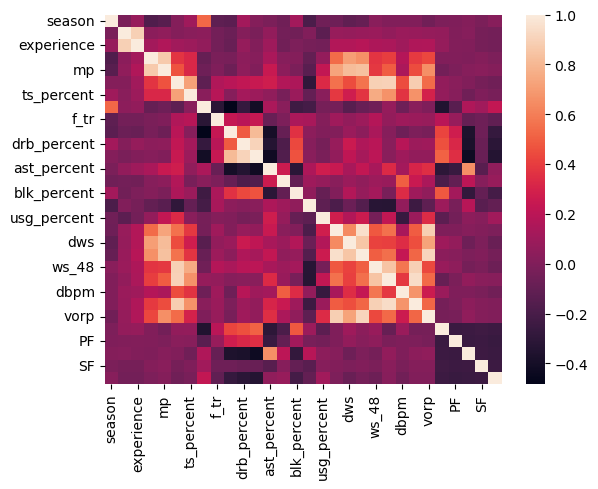

In [355]:
dataplot = sns.heatmap(df_nba_3_np.corr())
plt.show()

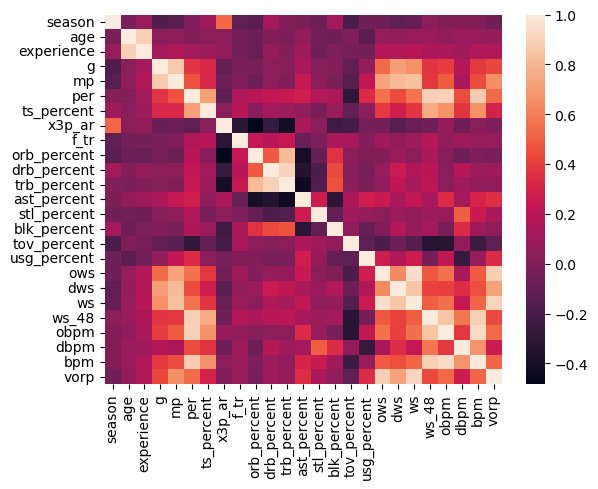

In [356]:
df_nba_no_dummies = df_nba_3_np.iloc[:, 0:25]
dataplot = sns.heatmap(df_nba_no_dummies.corr())
plt.show()

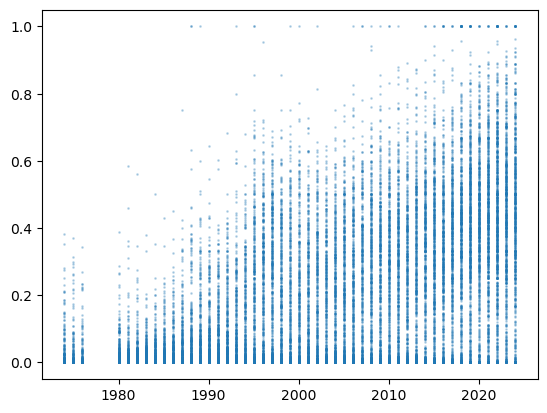

In [357]:
plt.scatter(df_nba_3_np["season"], df_nba_3_np["x3p_ar"], s = 1, alpha = .25)

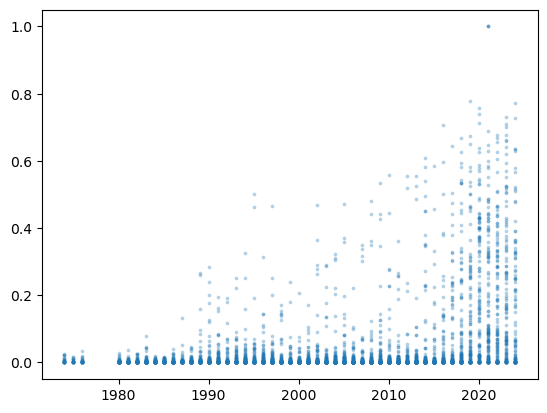

In [358]:
df_nba_centers = df_nba_3_np[df_nba_3_np["C"] == 1]
plt.scatter(df_nba_centers["season"], df_nba_centers["x3p_ar"], s = 3, alpha = .25)

In [359]:
df_nba_centers[df_nba_centers["x3p_ar"] > .5]

,season,age,experience,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,C,PF,PG,SF,SG
seas_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31146,2024,37.0,17,48,1294.0,14.2,0.629,0.629,0.069,5.3,20.2,13.2,12.8,1.0,3.4,10.2,11.2,2.3,2.1,4.4,0.164,1.3,2.3,3.6,1.8,1,0,0,0,0
31198,2024,35.0,16,57,1781.0,15.0,0.595,0.523,0.167,5.4,13.3,9.5,7.1,1.0,7.3,8.0,16.0,2.1,2.3,4.4,0.120,0.1,1.1,1.3,1.5,1,0,0,0,0
31269,2024,29.0,7,56,1041.0,15.6,0.603,0.511,0.237,7.4,20.8,14.2,18.0,1.4,0.8,14.6,19.3,1.7,1.1,2.8,0.129,0.9,0.5,1.4,0.9,1,0,0,0,0
31319,2024,27.0,1,43,735.0,15.7,0.581,0.515,0.193,9.1,16.3,12.4,10.1,1.4,2.7,9.1,20.4,1.0,0.6,1.6,0.106,0.1,-0.5,-0.4,0.3,1,0,0,0,0
31432,2024,25.0,3,12,34.0,15.1,0.715,0.727,0.182,3.3,25.6,14.7,4.0,1.5,0.0,7.8,16.4,0.1,0.0,0.1,0.175,-0.5,-0.4,-0.9,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,2013,23.0,2,6,31.0,8.5,0.506,0.556,0.222,12.6,15.0,13.9,0.0,1.7,2.6,23.3,19.9,0.0,0.0,0.0,0.002,-4.5,-1.4,-5.9,0.0,1,0,0,0,0
23407,2012,35.0,14,15,146.0,10.7,0.542,0.556,0.444,3.0,11.5,7.2,24.3,1.4,1.0,27.1,13.5,0.1,0.1,0.2,0.060,-1.0,0.1,-1.0,0.0,1,0,0,0,0
23745,2012,32.0,10,17,454.0,8.4,0.460,0.518,0.036,5.5,15.5,10.4,11.1,1.1,0.8,15.0,16.8,-0.2,0.1,0.0,-0.004,-2.7,-1.8,-4.5,-0.3,1,0,0,0,0


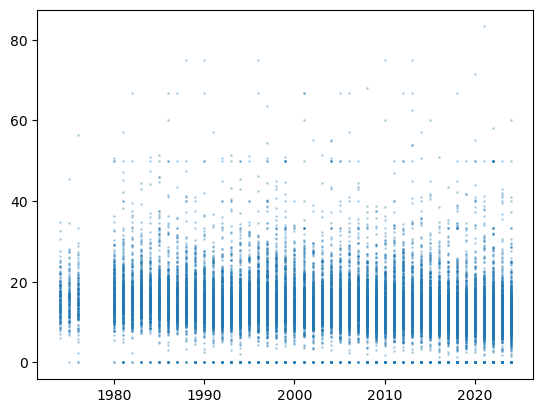

In [360]:
plt.scatter(df_nba_3_np["season"], df_nba_3_np["tov_percent"], s = 1, alpha = .25)

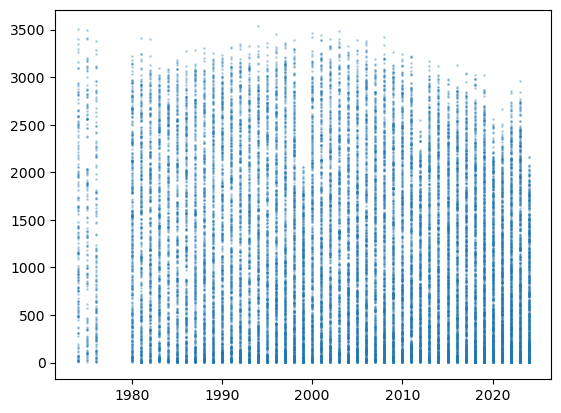

In [361]:
plt.scatter(df_nba_3_np["season"], df_nba_3_np["mp"], s = 1, alpha = .25)

In [362]:
sc = preprocessing.StandardScaler()
X = df_nba_3_np.drop(["season"], axis = 1)
y = df_nba_3_np["season"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [363]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_linear_pred = model_linear.predict(X_test)
df_linear_pred = pd.DataFrame(y_linear_pred, columns = ['linear_pred'])
df_scores = pd.DataFrame(y_test).reset_index()
df_results = pd.concat([df_scores, df_linear_pred], axis=1)
df_results['linear_resid'] = df_results['season'] - df_results['linear_pred']
display(df_results)

,seas_id,season,linear_pred,linear_resid
0,25753,2016,2014.400755,1.599245
1,19194,2004,2006.517081,-2.517081
2,9585,1984,1992.381927,-8.381927
3,29222,2021,2011.285622,9.714378
4,9830,1985,1996.427593,-11.427593
...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641
7245,10659,1987,2009.472396,-22.472396
7246,31579,2024,2021.584469,2.415531
7247,18666,2003,2008.479406,-5.479406


In [364]:
lasso = Lasso(alpha=.5, fit_intercept=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred_05 = lasso.predict(X_test)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso_05 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_05 = pd.concat([names, df_lasso_05], axis = 1)
df_lasso_05.columns = ['Feature', 'lasso_coeff_05']
df_lasso_05 = df_lasso_05.sort_values(by='lasso_coeff_05', ascending = False)
df_lasso_05

Lasso R Sq. Score ---------

0.41782077425546094

---------------------------


,Feature,lasso_coeff_05
6,x3p_ar,21.278787
1,experience,1.229661
13,blk_percent,0.979334
4,per,0.455546
9,drb_percent,0.355294
11,ast_percent,0.090684
16,ows,0.000000
24,C,0.000000
23,vorp,-0.000000
27,SF,-0.000000


In [365]:
df_lasso_pred_05 = pd.DataFrame(lasso_pred_05, columns = ['lasso_pred_05'])
df_results = pd.concat([df_results, df_lasso_pred_05], axis=1)
df_results['lasso_resid_05'] = df_results['season'] - df_results['lasso_pred_05']
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463
...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137


In [366]:
lasso = Lasso(alpha=1, fit_intercept=True, max_iter=3000)
lasso.fit(X_train, y_train)
lasso_pred_1 = lasso.predict(X_test)
print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test, y_test))
print('')
print ('---------------------------')
df_lasso_1 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_1 = pd.concat([names, df_lasso_1], axis = 1)
df_lasso_1.columns = ['Feature', 'lasso_coeff_1']
df_lasso_1 = df_lasso_1.sort_values(by='lasso_coeff_1', ascending = False)
df_lasso_1

Lasso R Sq. Score ---------

0.27050798842883084

---------------------------


,Feature,lasso_coeff_1
6,x3p_ar,5.620477
1,experience,1.026197
13,blk_percent,0.685046
9,drb_percent,0.374528
11,ast_percent,0.087914
4,per,0.033050
24,C,-0.000000
23,vorp,-0.000000
22,bpm,-0.000000
20,obpm,0.000000


In [367]:
df_lasso_pred_1 = pd.DataFrame(lasso_pred_1, columns = ['lasso_pred_1'])
df_results = pd.concat([df_results, df_lasso_pred_1], axis=1)
df_results['lasso_resid_1'] = df_results['season'] - df_results['lasso_pred_1']
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527
...,...,...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713,2000.705601,-4.705601
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900,2005.057417,-18.057417
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696,2012.686125,11.313875
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137,2006.312240,-3.312240


In [368]:
ridge = Ridge(alpha=0.5, fit_intercept=True,  max_iter=3000)
ridge.fit(X_train, y_train)
ridge_pred_05 = ridge.predict(X_test)
df_ridge_pred = pd.DataFrame(ridge_pred_05, columns = ['ridge_pred_05'])
df_target = pd.DataFrame(y_test).reset_index()
df_ridge_05 = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge_05 = pd.concat([names, df_ridge_05], axis = 1)
df_ridge_05.columns = ['Feature', 'ridge_coeff_05']
df_ridge_05 = df_ridge_05.sort_values(by='ridge_coeff_05', ascending = False)
df_ridge_05

,Feature,ridge_coeff_05
6,x3p_ar,36.781174
5,ts_percent,19.791520
1,experience,1.428176
21,dbpm,1.208949
13,blk_percent,1.178081
16,ows,0.929885
17,dws,0.824452
20,obpm,0.766327
24,C,0.720165
4,per,0.709478


In [369]:
df_results = pd.concat([df_results, df_ridge_pred], axis=1)
df_results['ridge_resid_05'] = df_results['season'] - df_results['ridge_pred_05']
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1,ridge_pred_05,ridge_resid_05
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957,2014.454885,1.545115
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866,2006.538703,-2.538703
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698,1992.399407,-8.399407
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975,2011.258922,9.741078
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527,1996.424781,-11.424781
...,...,...,...,...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713,2000.705601,-4.705601,2010.956478,-14.956478
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900,2005.057417,-18.057417,2009.493898,-22.493898
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696,2012.686125,11.313875,2021.570669,2.429331
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137,2006.312240,-3.312240,2008.486598,-5.486598


In [370]:
ridge = Ridge(alpha=1, fit_intercept=True,  max_iter=3000)
ridge.fit(X_train, y_train)
ridge_pred_1 = ridge.predict(X_test)
df_ridge_pred = pd.DataFrame(ridge_pred_1, columns = ['ridge_pred_1'])
df_target = pd.DataFrame(y_test).reset_index()
df_ridge_1 = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge_1 = pd.concat([names, df_ridge_1], axis = 1)
df_ridge_1.columns = ['Feature', 'ridge_coeff_1']
df_ridge_1 = df_ridge_1.sort_values(by='ridge_coeff_1', ascending = False)
display(df_ridge_1.head())
display(df_ridge_1.tail())

,Feature,ridge_coeff_1
6,x3p_ar,36.723641
5,ts_percent,19.631072
1,experience,1.428596
13,blk_percent,1.191003
21,dbpm,1.154987


,Feature,ridge_coeff_1
27,SF,-0.845109
0,age,-1.339691
22,bpm,-1.596513
23,vorp,-2.134905
19,ws_48,-20.848067


In [371]:
df_results = pd.concat([df_results, df_ridge_pred], axis=1)
df_results['ridge_resid_1'] = df_results['season'] - df_results['ridge_pred_1']
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1,ridge_pred_05,ridge_resid_05,ridge_pred_1,ridge_resid_1
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957,2014.454885,1.545115,2014.501381,1.498619
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866,2006.538703,-2.538703,2006.556817,-2.556817
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698,1992.399407,-8.399407,1992.416079,-8.416079
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975,2011.258922,9.741078,2011.234251,9.765749
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527,1996.424781,-11.424781,1996.421002,-11.421002
...,...,...,...,...,...,...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713,2000.705601,-4.705601,2010.956478,-14.956478,2010.908157,-14.908157
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900,2005.057417,-18.057417,2009.493898,-22.493898,2009.512577,-22.512577
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696,2012.686125,11.313875,2021.570669,2.429331,2021.558097,2.441903
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137,2006.312240,-3.312240,2008.486598,-5.486598,2008.493002,-5.493002


In [372]:
df_resid_melt = pd.melt(df_results, id_vars=['seas_id'], \
                 value_vars=['ridge_resid_05', 'ridge_resid_1', 'linear_resid', 'lasso_resid_05', 'lasso_resid_1'])
df_resid_melt=df_resid_melt.rename(columns = {'value':'Residual'})
df_pred_melt = pd.melt(df_results, id_vars=['seas_id', 'season'], \
                 value_vars=['ridge_pred_05', 'ridge_pred_1', 'linear_pred', 'lasso_pred_05', 'lasso_pred_1'])
df_pred_melt=df_pred_melt.rename(columns = {'variable': 'Reg_Type', 'value':'Prediction'})
df_pred_melt['Reg_Type'] = df_pred_melt.Reg_Type.str.replace('_pred', '')
df_pred_resid = pd.concat([df_pred_melt, df_resid_melt['Residual']], axis=1)
df_pred_resid

,seas_id,season,Reg_Type,Prediction,Residual
0,25753,2016,ridge_05,2014.454885,1.545115
1,19194,2004,ridge_05,2006.538703,-2.538703
2,9585,1984,ridge_05,1992.399407,-8.399407
3,29222,2021,ridge_05,2011.258922,9.741078
4,9830,1985,ridge_05,1996.424781,-11.424781
...,...,...,...,...,...
36240,14768,1996,lasso_1,2000.705601,-4.705601
36241,10659,1987,lasso_1,2005.057417,-18.057417
36242,31579,2024,lasso_1,2012.686125,11.313875
36243,18666,2003,lasso_1,2006.312240,-3.312240


In [373]:
df_results['ridge_resid_05_abs'] = abs(df_results['ridge_resid_05'])
df_results['ridge_resid_1_abs'] = abs(df_results['ridge_resid_1'])
df_results['linreg_resid_abs'] = abs(df_results['linear_resid'])
df_results['lasso_resid_05_abs'] = abs(df_results['lasso_resid_05'])
df_results['lasso_resid_1_abs'] = abs(df_results['lasso_resid_1'])
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1,ridge_pred_05,ridge_resid_05,ridge_pred_1,ridge_resid_1,ridge_resid_05_abs,ridge_resid_1_abs,linreg_resid_abs,lasso_resid_05_abs,lasso_resid_1_abs
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957,2014.454885,1.545115,2014.501381,1.498619,1.545115,1.498619,1.599245,3.390947,6.155957
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866,2006.538703,-2.538703,2006.556817,-2.556817,2.538703,2.556817,2.517081,0.897833,1.179866
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698,1992.399407,-8.399407,1992.416079,-8.416079,8.399407,8.416079,8.381927,12.894410,17.068698
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975,2011.258922,9.741078,2011.234251,9.765749,9.741078,9.765749,9.714378,14.963012,16.372975
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527,1996.424781,-11.424781,1996.421002,-11.421002,11.424781,11.421002,11.427593,10.513463,11.389527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713,2000.705601,-4.705601,2010.956478,-14.956478,2010.908157,-14.908157,14.956478,14.908157,15.008641,8.721713,4.705601
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900,2005.057417,-18.057417,2009.493898,-22.493898,2009.512577,-22.512577,22.493898,22.512577,22.472396,20.306900,18.057417
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696,2012.686125,11.313875,2021.570669,2.429331,2021.558097,2.441903,2.429331,2.441903,2.415531,6.692696,11.313875
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137,2006.312240,-3.312240,2008.486598,-5.486598,2008.493002,-5.493002,5.486598,5.493002,5.479406,3.914137,3.312240


In [374]:
df_results_T = df_results[['ridge_resid_05_abs', 'ridge_resid_1_abs', 'linreg_resid_abs', 'lasso_resid_05_abs',
                          'lasso_resid_1_abs']].T
minResid = df_results_T.min()
minResid = pd.DataFrame(minResid.T, columns = ['resid_min'])
df_results = pd.concat([df_results, minResid], axis=1)
df_results.head(10)

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1,ridge_pred_05,ridge_resid_05,ridge_pred_1,ridge_resid_1,ridge_resid_05_abs,ridge_resid_1_abs,linreg_resid_abs,lasso_resid_05_abs,lasso_resid_1_abs,resid_min
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957,2014.454885,1.545115,2014.501381,1.498619,1.545115,1.498619,1.599245,3.390947,6.155957,1.498619
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866,2006.538703,-2.538703,2006.556817,-2.556817,2.538703,2.556817,2.517081,0.897833,1.179866,0.897833
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698,1992.399407,-8.399407,1992.416079,-8.416079,8.399407,8.416079,8.381927,12.894410,17.068698,8.381927
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975,2011.258922,9.741078,2011.234251,9.765749,9.741078,9.765749,9.714378,14.963012,16.372975,9.714378
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527,1996.424781,-11.424781,1996.421002,-11.421002,11.424781,11.421002,11.427593,10.513463,11.389527,10.513463
5,12660,1991,1999.500559,-8.500559,2000.566281,-9.566281,2001.931964,-10.931964,1999.497207,-8.497207,1999.494080,-8.494080,8.497207,8.494080,8.500559,9.566281,10.931964,8.494080
6,18740,2004,2004.020638,-0.020638,2006.499087,-2.499087,2009.288774,-5.288774,2004.044329,-0.044329,2004.064364,-0.064364,0.044329,0.064364,0.020638,2.499087,5.288774,0.020638
7,28249,2019,1997.552796,21.447204,1999.795645,19.204355,2002.472888,16.527112,1997.540706,21.459294,1997.530837,21.469163,21.459294,21.469163,21.447204,19.204355,16.527112,16.527112
8,25760,2016,2010.000330,5.999670,2006.487069,9.512931,2004.483390,11.516610,2009.990687,6.009313,2009.981603,6.018397,6.009313,6.018397,5.999670,9.512931,11.516610,5.999670
9,19019,2004,2000.793440,3.206560,2004.685737,-0.685737,2007.993592,-3.993592,2000.803091,3.196909,2000.812338,3.187662,3.196909,3.187662,3.206560,0.685737,3.993592,0.685737


In [375]:
def bestreg(c):
  if c['ridge_resid_05_abs'] == c['resid_min'] :
    return 'Ridge05'
  elif c['ridge_resid_1_abs'] == c['resid_min'] :
    return 'Ridge1'
  elif c['linreg_resid_abs'] == c['resid_min'] :
    return 'Linear'
  elif c['lasso_resid_05_abs'] == c['resid_min'] :
    return 'Lasso05'
  else: 
    return 'Lasso1'
df_results['best_reg'] = df_results.apply(bestreg, axis=1)
df_results

,seas_id,season,linear_pred,linear_resid,lasso_pred_05,lasso_resid_05,lasso_pred_1,lasso_resid_1,ridge_pred_05,ridge_resid_05,ridge_pred_1,ridge_resid_1,ridge_resid_05_abs,ridge_resid_1_abs,linreg_resid_abs,lasso_resid_05_abs,lasso_resid_1_abs,resid_min,best_reg
0,25753,2016,2014.400755,1.599245,2012.609053,3.390947,2009.844043,6.155957,2014.454885,1.545115,2014.501381,1.498619,1.545115,1.498619,1.599245,3.390947,6.155957,1.498619,Ridge1
1,19194,2004,2006.517081,-2.517081,2004.897833,-0.897833,2002.820134,1.179866,2006.538703,-2.538703,2006.556817,-2.556817,2.538703,2.556817,2.517081,0.897833,1.179866,0.897833,Lasso05
2,9585,1984,1992.381927,-8.381927,1996.894410,-12.894410,2001.068698,-17.068698,1992.399407,-8.399407,1992.416079,-8.416079,8.399407,8.416079,8.381927,12.894410,17.068698,8.381927,Linear
3,29222,2021,2011.285622,9.714378,2006.036988,14.963012,2004.627025,16.372975,2011.258922,9.741078,2011.234251,9.765749,9.741078,9.765749,9.714378,14.963012,16.372975,9.714378,Linear
4,9830,1985,1996.427593,-11.427593,1995.513463,-10.513463,1996.389527,-11.389527,1996.424781,-11.424781,1996.421002,-11.421002,11.424781,11.421002,11.427593,10.513463,11.389527,10.513463,Lasso05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641,2004.721713,-8.721713,2000.705601,-4.705601,2010.956478,-14.956478,2010.908157,-14.908157,14.956478,14.908157,15.008641,8.721713,4.705601,4.705601,Lasso1
7245,10659,1987,2009.472396,-22.472396,2007.306900,-20.306900,2005.057417,-18.057417,2009.493898,-22.493898,2009.512577,-22.512577,22.493898,22.512577,22.472396,20.306900,18.057417,18.057417,Lasso1
7246,31579,2024,2021.584469,2.415531,2017.307304,6.692696,2012.686125,11.313875,2021.570669,2.429331,2021.558097,2.441903,2.429331,2.441903,2.415531,6.692696,11.313875,2.415531,Linear
7247,18666,2003,2008.479406,-5.479406,2006.914137,-3.914137,2006.312240,-3.312240,2008.486598,-5.486598,2008.493002,-5.493002,5.486598,5.493002,5.479406,3.914137,3.312240,3.312240,Lasso1


In [376]:
df_best_reg = pd.DataFrame(df_results['best_reg'].value_counts())
df_best_reg

,best_reg
Linear,2536
Lasso1,2096
Ridge1,1654
Lasso05,910
Ridge05,53


In [377]:
df_results = pd.concat([df_scores, df_linear_pred], axis=1)
df_results['linear_resid'] = df_results['season'] - df_results['linear_pred']
display(df_results)

,seas_id,season,linear_pred,linear_resid
0,25753,2016,2014.400755,1.599245
1,19194,2004,2006.517081,-2.517081
2,9585,1984,1992.381927,-8.381927
3,29222,2021,2011.285622,9.714378
4,9830,1985,1996.427593,-11.427593
...,...,...,...,...
7244,14768,1996,2011.008641,-15.008641
7245,10659,1987,2009.472396,-22.472396
7246,31579,2024,2021.584469,2.415531
7247,18666,2003,2008.479406,-5.479406


In [390]:
model_linear = LinearRegression()
model_linear.fit(X, y)
y_linear_pred = model_linear.predict(X)
df_linear_pred = pd.DataFrame(y_linear_pred, columns = ['linear_pred'])
df_scores = pd.DataFrame(y).reset_index()
df_results = pd.concat([df_scores, df_linear_pred], axis=1)
df_results['linear_resid'] = df_results['season'] - df_results['linear_pred']
df_linear = pd.DataFrame(model_linear.coef_)
names = pd.DataFrame(list(X.columns))
df_linear = pd.concat([names, df_linear], axis = 1)
df_linear.columns = ['Feature', 'linear_coeff']
df_linear = df_linear.sort_values(by='linear_coeff', ascending = False)
df_results = df_results.drop("season", axis = 1)
df_linear

,Feature,linear_coeff
6,x3p_ar,37.451142
5,ts_percent,17.911800
1,experience,1.429041
21,dbpm,1.195512
4,per,1.025765
13,blk_percent,1.000971
24,C,0.866074
18,ws,0.800865
20,obpm,0.415090
16,ows,0.260843


In [399]:
df_nba_final = pd.merge(df_nba_3, df_results, on = "seas_id", how = "inner")
df_nba_final

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,linear_pred,linear_resid
0,31136,2024,5025,A.J. Green,SG,24.0,2,NBA,MIL,39,357.0,12.1,0.635,0.867,0.063,1.9,10.1,6.1,7.8,0.4,0.5,3.7,16.3,0.6,0.2,0.8,0.110,0.9,-2.1,-1.2,0.1,2027.884417,-3.884417
1,31137,2024,5026,A.J. Lawson,SG,23.0,2,NBA,DAL,28,231.0,12.7,0.562,0.471,0.224,5.7,10.0,7.8,7.8,1.9,1.1,9.7,19.1,0.1,0.2,0.3,0.065,-1.9,-1.3,-3.3,-0.1,2016.439637,7.560363
2,31138,2024,5027,AJ Griffin,SF,20.0,2,NBA,ATL,18,132.0,1.8,0.403,0.733,0.044,1.6,10.2,5.7,3.8,0.4,0.7,11.6,16.1,-0.3,0.0,-0.3,-0.098,-5.5,-3.3,-8.8,-0.2,2025.658357,-1.658357
3,31139,2024,4219,Aaron Gordon,PF,28.0,10,NBA,DEN,54,1699.0,16.6,0.607,0.186,0.379,8.6,14.3,11.5,13.8,1.3,1.9,11.4,17.9,3.0,2.0,4.9,0.139,0.9,0.1,1.0,1.3,2010.702544,13.297456
4,31140,2024,4582,Aaron Holiday,PG,27.0,6,NBA,HOU,56,967.0,11.4,0.591,0.535,0.145,1.8,8.9,5.3,15.2,1.5,0.5,11.8,16.4,0.9,1.0,1.9,0.093,-1.7,0.5,-1.2,0.2,2015.542543,8.457457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24157,6057,1974,1547,Wilbert Robinson,SG,24.0,1,ABA,MMT,45,956.0,10.8,0.451,0.015,0.167,3.0,5.6,4.3,20.4,2.6,0.5,17.6,22.4,-0.5,0.3,-0.1,-0.006,-3.4,-0.6,-3.9,-0.5,1990.344968,-16.344968
24158,6058,1974,1413,Willie Long,SF,23.0,3,ABA,DNR,82,2058.0,13.7,0.485,0.002,0.351,9.3,13.5,11.3,7.0,1.2,0.3,12.8,23.0,1.8,1.7,3.5,0.082,-0.9,-1.1,-2.0,0.0,1991.709633,-17.709633
24159,6060,1974,1415,Willie Sojourner,C,25.0,3,ABA,NYA,82,1316.0,12.3,0.512,0.007,0.153,8.4,16.6,12.6,5.2,0.8,3.7,16.0,15.7,0.8,2.2,3.0,0.109,-2.4,1.2,-1.3,0.2,1996.335911,-22.335911
24160,6061,1974,1236,Willie Wise,SF,26.0,5,ABA,UTS,82,3292.0,20.1,0.544,0.011,0.344,5.6,13.7,9.8,13.8,1.7,0.7,10.7,23.9,8.0,2.5,10.5,0.153,2.8,-0.5,2.3,3.6,1992.202660,-18.202660


In [392]:
df_nba_500 = df_nba_final[df_nba_final["mp"]>500]

In [400]:
df_nba_final = df_nba_final[["player", "mp", "season", "x3p_ar", "linear_pred", "linear_resid"]]
df_nba_final.sort_values("linear_resid").head(10)

,player,mp,season,x3p_ar,linear_pred,linear_resid
23229,Monti Davis,2.0,1981,0.0,2045.229548,-64.229548
20737,Walker Russell,1.0,1988,1.0,2052.190209,-64.190209
17635,Anthony Cook,2.0,1994,0.0,2052.187445,-58.187445
20445,Dudley Bradley,5.0,1988,1.0,2041.339057,-53.339057
23807,Paul Ruffner,5.0,1976,0.0,2028.041260,-52.041260
20823,Cozell McQueen,7.0,1987,0.0,2035.372458,-48.372458
1259,Stanley Umude,2.0,2023,1.0,2069.515533,-46.515533
3796,Jawun Evans,1.0,2019,1.0,2065.207420,-46.207420
23394,Carl Kilpatrick,6.0,1980,0.0,2022.158866,-42.158866
20174,Mike Dunleavy,5.0,1989,1.0,2028.358905,-39.358905


In [394]:
df_nba_500 = df_nba_500[["player", "season", "x3p_ar", "linear_pred", "linear_resid"]]
df_nba_500.sort_values("linear_resid").head(10)

,player,season,x3p_ar,linear_pred,linear_resid
23860,Billy Shepherd,1975,0.370,2003.939238,-28.939238
24052,Glen Combs,1974,0.274,2002.937790,-28.937790
24059,Jim Ard,1974,0.012,2002.477538,-28.477538
23133,Joe Hassett,1981,0.459,2009.476464,-28.476464
24072,Joe Hamilton,1974,0.232,2002.459568,-28.459568
24136,Roy Ebron,1974,0.005,2002.220144,-28.220144
23810,Randy Denton,1976,0.000,2004.044468,-28.044468
22767,Joe Hassett,1982,0.560,2009.888699,-27.888699
24001,Billy Shepherd,1974,0.381,2001.560889,-27.560889
23794,Maurice Lucas,1976,0.020,2003.460195,-27.460195


In [395]:
df_nba_pred_3pr = df_nba_500[df_nba_500["linear_pred"]>2014.5]
df_nba_pred_3pr = df_nba_pred_3pr[["player", "season", "x3p_ar", "linear_pred", "linear_resid"]]
df_nba_pred_3pr.sort_values("linear_resid").head(10)

,player,season,x3p_ar,linear_pred,linear_resid
19189,Jim Les,1991,0.575,2014.843677,-23.843677
18731,Jim Les,1992,0.682,2015.801465,-23.801465
18400,Morlon Wiley,1993,0.595,2016.475397,-23.475397
16677,Brad Lohaus,1996,0.697,2018.703001,-22.703001
17208,Brad Lohaus,1995,0.671,2017.662652,-22.662652
16455,Nate McMillan,1997,0.564,2018.362151,-21.362151
17925,Matt Bullard,1994,0.681,2014.503723,-20.503723
16393,Lee Mayberry,1997,0.597,2017.365199,-20.365199
13582,Dan Majerle,2002,0.813,2022.184337,-20.184337
16502,Robert Horry,1997,0.461,2017.072190,-20.072190


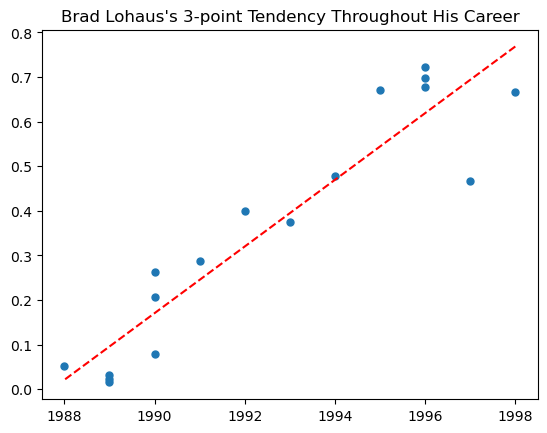

In [410]:
df_Brad = df_nba_final[df_nba_final["player"]=="Brad Lohaus"]
plt.scatter(df_Brad["season"], df_Brad["x3p_ar"], s = 25, alpha = 1)
z = np.polyfit(df_Brad["season"], df_Brad["x3p_ar"], 1)
p = np.poly1d(z)
plt.plot(df_Brad["season"],p(df_Brad["season"]),"r--")
plt.title("Brad Lohaus's 3-point Tendency Throughout His Career")
plt.show()

In [411]:
df_nba_real_3pr = df_nba_500[df_nba_500["season"]>2014.5]
df_nba_real_3pr = df_nba_real_3pr[["player", "season", "linear_pred", "linear_resid"]]
df_nba_real_3pr.sort_values("linear_resid", ascending = False).head(10)

,player,season,linear_pred,linear_resid
5861,Nick Collison,2016,1991.239995,24.760005
2196,Brad Wanamaker,2021,1997.117912,23.882088
2770,Thanasis Antetokounmpo,2021,1997.158818,23.841182
2894,Brad Wanamaker,2020,1996.189512,23.810488
966,Jimmy Butler,2023,1999.676616,23.323384
6334,Joey Dorsey,2015,1991.778394,23.221606
690,Anthony Gill,2023,1999.943403,23.056597
664,Zion Williamson,2024,2000.973803,23.026197
5603,Dwyane Wade,2016,1993.159021,22.840979
242,Ish Smith,2024,2001.398756,22.601244
